# Notebook on reading the data analysis

Data analysis is saved in JSON files inside the directory containing the data.

Although JSON files are readable since they are written in ASCII, a better way of reading in an organized structure is explained.

In [1]:
from showspectra.inout import getSpectra

file = '/Users/dfadda/Python/WIYN/A85_0/showspectra.json'
spectra = getSpectra(file)

In [2]:
n = len(spectra)
print("There are ",n,' spectra')

There are  76  spectra


In [3]:
# Skip sky spectra
import numpy as np

spectypes = np.array([s.spectype for s in spectra])
qualities = np.array([s.quality for s in spectra])
z = np.array([s.z for s in spectra])

idx = (spectypes != 'sky') & (qualities != '?') & (z > 0.04) & (z < 0.06)

In [4]:
print('There are ',np.sum(idx),' cluster member candidates')

There are  2  cluster member candidates


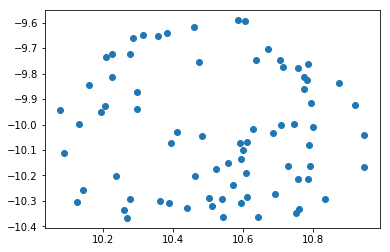

In [5]:
from astropy.coordinates import SkyCoord
from astropy import units as u

coords = [SkyCoord(s.ra, s.dec, frame='icrs', unit=(u.hourangle, u.deg)) for s in spectra]
ra = np.array([c.ra.value for c in coords])
dec = np.array([c.dec.value for c in coords])

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ra,dec,'o')
plt.show()

In [30]:
print(spectra[1].lines.keys())

dict_keys(['[NII] 6549', 'H-alpha 6564', '[NII] 6585', 'SII 6718', '[OI] 6302', 'HeI 5877', 'A:Na 5894', '[OIII] 4960', '[OIII] 5008', 'H-beta 4862', 'A:H-beta 4862'])


In [49]:
# Lines measured
Ha = np.zeros(n)
Hb = np.zeros(n)
NII = np.zeros(n)
OIII = np.zeros(n)

for i, s in enumerate(spectra):
    if len(s.lines) > 0:
        try:
            Ha[i] = s.lines['H-alpha 6564'].flux
        except:
            pass
        try:
            Hb[i] = s.lines['H-beta 4862'].flux
        except:
            pass
        try:
            NII[i] = s.lines['[NII] 6585'].flux
        except:
            pass
        try:
            OIII[i] = s.lines['[OIII] 5008'].flux
        except:
            pass
    #else:
    #    Ha[i] = np.nan

[0.00000000e+00 5.45954460e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.07051355e-14
 1.06112070e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.06829696e-14 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.96767317e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.35556018e-15 0.00000000e+00 7.46443861e-14
 0.00000000e+00 5.64229112e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.86640002e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.21014047e-15
 0.00000000e+00 7.01736500e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.52524105e-15 4.42810456e-14
 4.09493331e-15 2.35238503e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

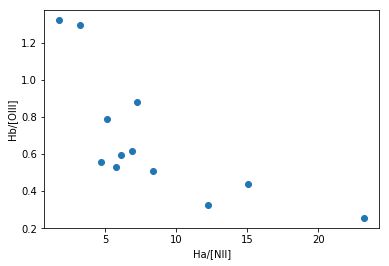

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

idx = (Ha > 0) & (NII > 0) & (Hb > 0) & (OIII > 0)
plt.plot(Ha[idx]/NII[idx], Hb[idx]/OIII[idx], 'o')
plt.xlabel('Ha/[NII]')
plt.ylabel('Hb/[OIII]')
plt.show()